In [69]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
import heartpy as hp
def visualize_ecg(data_file, title='Heart Rate Signal Peak Detection', xlim_from=None, xlim_to=None):
    data = hp.get_data(data_file, delim = ' ')
    working_data, measures = hp.process(data, 500.0)
    plot_object = hp.plotter(working_data, measures, show=False, title=title)
    plot_object.set_size_inches(25, 10)
    
    if xlim_from is not None and xlim_to is not None:
        print('LIM')
        plt.xlim(xlim_from, xlim_to)
    
    plot_object.show()


data, _ = hp.load_exampledata(0)
fs = 100.0 #example file 0 is sampled at 100.0 Hz
working_data, measures = hp.process(data, fs, report_time=True)

print(measures)


Finished in 0.009791 sec
{'bpm': 58.898847631242, 'ibi': 1018.695652173913, 'sdnn': 65.76006108019, 'sdsd': 34.866925292300195, 'rmssd': 64.73723110319973, 'pnn20': 0.8636363636363636, 'pnn50': 0.4090909090909091, 'hr_mad': 40.0, 'sd1': 45.75807746062504, 'sd2': 82.92683223259064, 's': 11921.000815765336, 'sd1/sd2': 0.5517885614186272, 'breathingrate': 0.17072129748186085}


{'bpm': 166.76821545686687, 'ibi': 359.7807881773399, 'sdnn': 155.60551114560874, 'sdsd': 125.0475009876755, 'rmssd': 161.6486656097432, 'pnn20': 0.5148443157132513, 'pnn50': 0.44243301955104997, 'hr_mad': 110.0, 'sd1': 114.27703312154337, 'sd2': 187.88640475575139, 's': 67453.4528499168, 'sd1/sd2': 0.6082240663985308, 'breathingrate': 0.22249606353118365}
LIM


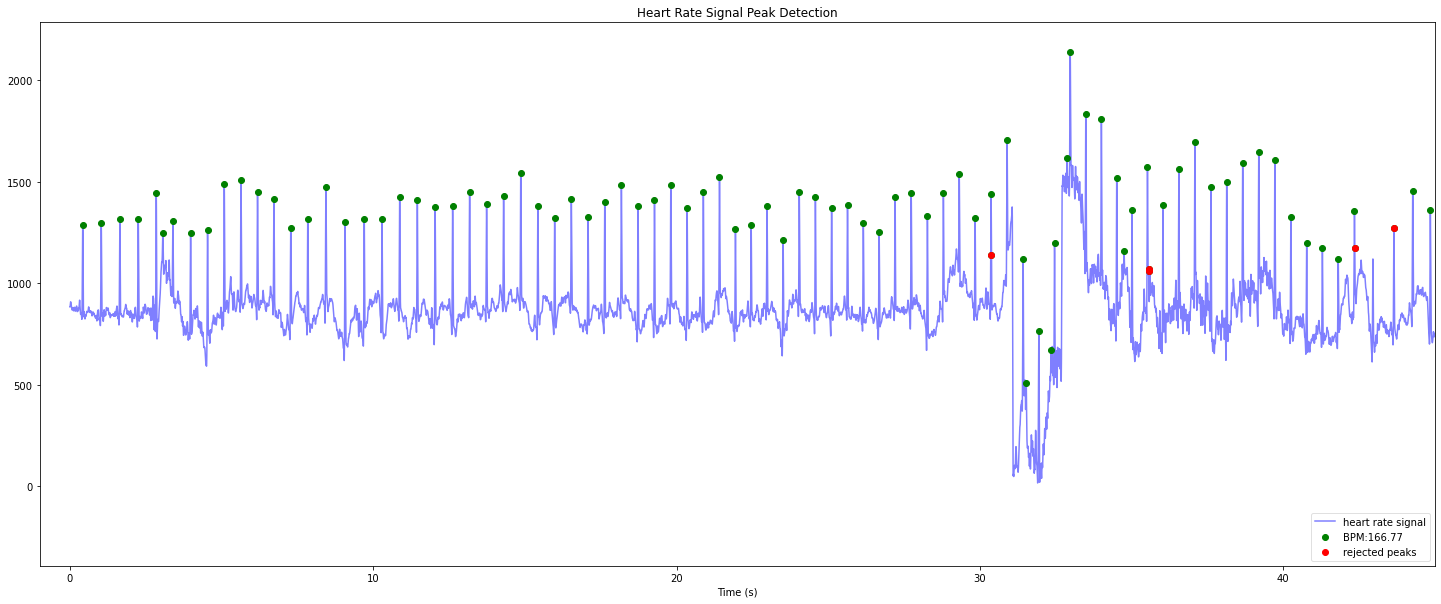

In [125]:
data_file = 'test/17849-2017-05-31-12-17-48-Belastungs-EKG.xml_20170531121748.958_20170531123128.678.txt'
data = hp.get_data(data_file, delim = ' ')
working_data, measures = hp.process(data, 500.0)
print(measures)
#print(working_data)

visualize_ecg(data_file, xlim_from=-1, xlim_to=45)

In [126]:
%matplotlib inline
import heartpy as hp
import xml.etree.cElementTree as ET
import pathlib
from datetime import datetime
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [137]:
namespaces = {'': 'urn:hl7-org:v3'}

datetime_format = '%Y%m%d%H%M%S.%f'

In [138]:
def get_data_from_xml(file, out_path, visualize=False):
    ecg = {}
    
    file_name_split = file.name.split('-')
    ecg['id'] = file_name_split[0]
    ecg['type'] = file_name_split[-2]
    
    tree = ET.parse(file)
    root = tree.getroot()
    
    effectiveTimeLow = root.find('effectiveTime/low', namespaces).get('value')
    date_time_obj = datetime.strptime(effectiveTimeLow, datetime_format)
    ecg['effectiveTimeLow'] = date_time_obj
    
    effectiveTimeHigh = root.find('effectiveTime/high', namespaces).get('value')
    date_time_obj = datetime.strptime(effectiveTimeHigh, datetime_format)
    ecg['effectiveTimeHigh'] = date_time_obj
    
    # ECG data
    series = root.findall('component/series', namespaces)
    for s in series:
        effectiveTimeLow = s.find('effectiveTime/low', namespaces).get('value')
        effectiveTimeHigh = s.find('effectiveTime/high', namespaces).get('value')
        sequenceSet = s.find('component/sequenceSet', namespaces)
        # TODO: components in sequenceSet: leads
        digits = sequenceSet.find('component/sequence/value/digits', namespaces)
        
        with open(f'{out_path}/{file.name}_{effectiveTimeLow}_{effectiveTimeHigh}.txt', 'w') as f:
            f.write(digits.text)
            
        if visualize == True:
            visualize_ecg(f'{out_path}/{file.name}_{effectiveTimeLow}_{effectiveTimeHigh}.txt', title=file.name)
            
    return ecg

### Post Covid Patients

In [139]:
xml_folder="ExportPostCovid"
files = list(pathlib.Path(xml_folder).glob('*.xml'))
ecg_files_path = 'ecgs_post_covid/'
ecgs = []


for file in files:
    ecg = get_data_from_xml(file, ecg_files_path)
    ecgs.append(ecg)

In [130]:
for i in range(5):
    pp.pprint(ecgs[i])

{   'effectiveTimeHigh': datetime.datetime(2015, 11, 26, 8, 56, 21),
    'effectiveTimeLow': datetime.datetime(2015, 11, 26, 8, 56, 10, 903000),
    'id': '7010',
    'type': 'Ruhe'}
{   'effectiveTimeHigh': datetime.datetime(2021, 10, 26, 9, 29, 50),
    'effectiveTimeLow': datetime.datetime(2021, 10, 26, 9, 13, 45, 937000),
    'id': '17849',
    'type': 'Belastungs'}
{   'effectiveTimeHigh': datetime.datetime(2021, 11, 19, 8, 23, 51),
    'effectiveTimeLow': datetime.datetime(2021, 11, 19, 8, 13, 55, 150000),
    'id': '32243',
    'type': 'Belastungs'}
{   'effectiveTimeHigh': datetime.datetime(2021, 12, 1, 14, 38, 25),
    'effectiveTimeLow': datetime.datetime(2021, 12, 1, 14, 38, 14, 803000),
    'id': '32293',
    'type': 'Ruhe'}
{   'effectiveTimeHigh': datetime.datetime(2017, 10, 25, 10, 40, 14),
    'effectiveTimeLow': datetime.datetime(2017, 10, 25, 10, 24, 3, 247000),
    'id': '17031',
    'type': 'Belastungs'}


### Covid Patients

In [136]:
xml_folder="ExportCovid"
files = list(pathlib.Path(xml_folder).glob('*.xml'))
ecg_files_path = 'ecgs_covid/'
ecgs = []

for file in files:
    ecg = get_data_from_xml(file, ecg_files_path)
    ecgs.append(ecg)